# Problem Statement
<b style="color: #fff; background: #333; padding: 3px;">To develop a customer segmentation to define marketing strategy.</b>


### Why Segmentation of Customers?
<b>Customer segmentation is necessary. You can’t serve every customer the same product, experience, or ad as they won’t resonate with it the same. Doing so results in low-click through rate, engagement, and conversions.

That’s where segmenting comes into the picture. Finding all of the unique groups that make up a bigger customer base lets you get into customer’s heads and give them exactly what they want, improving their experience and boosting revenue.</b>


### Overview: 
The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. 
The file is at a customer level with 18 behavioral variables.

**Important Tasks (can be added with more insights):**
- Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:
    - Monthly average purchase and cash advance amount
    - Purchases by type (one-off, installments)
    - Average amount per purchase and cash advance transaction,
    - Limit usage (balance to credit limit ratio),
    - Payments to minimum payments ratio etc (think of more types of similar analysis)
- Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
- Identification of the relationships/ affinities between services.
- Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm to reveal the behavioral segments of credit card holders
- Identify cluster characteristics of the cluster using detailed profiling.
- Provide the strategic insights and implementation of strategies for given set of cluster characteristics


### Data Dictionary

|Variable                   |Description|
|:--------------------------|:----------|
|CUST_ID:                   |Credit card holder ID|
|BALANCE:                   |Monthly average balance (based on daily balance averages)|
|BALANCE_FREQUENCY:         |Ratio of last 12 months with balance|
|PURCHASES:                 |Total purchase amount spent during last 12 months|
|ONEOFF_PURCHASES:          |Total amount of one-off purchases|
|INSTALLMENTS_PURCHASES:    |Total amount of installment purchases|
|CASH_ADVANCE:              |Total cash-advance amount|
|PURCHASES_ FREQUENCY:      |Frequency of purchases (Percent of months with at least one purchase)|
|ONEOFF_PURCHASES_FREQUENCY:|Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases|
|CASH_ADVANCE_ FREQUENCY:   |Cash-Advance frequency|
|AVERAGE_PURCHASE_TRX:      |Average amount per purchase transaction|
|CASH_ADVANCE_TRX:          |Average amount per cash-advance transaction|
|PURCHASES_TRX:             |Average amount per purchase transaction|
|CREDIT_LIMIT:              |Credit limit|
|PAYMENTS:                  |Total payments (due amount paid by the customer to decrease their statement balance) in the period|
|MINIMUM_PAYMENTS:          |Total minimum payments due in the period.|
|PRC_FULL_PAYMEN:           |Percentage of months with full payment of the due statement balance|
|TENURE:                    |Number of months as a customer|


<h1>________________________________________________________________</h1>

### 1. Importing the libraries

In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

<h1>________________________________________________________________</h1>

### 2. Load and Pre-Processing the Data

In [85]:
# Load the dataset
data = pd.read_csv("Data for Associate DS.csv")

In [86]:
print("Shape of the data: ",data.shape)
data.head()

Shape of the data:  (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [87]:
# Check for central tendancies of the data
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [88]:
# Check for the columns and their datatypes
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [89]:
# Let's check for NULL values, if any.
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [90]:
# Treating the Null values in columns 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' with their respective median values

data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)

# Check again for the null values
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<h1>________________________________________________________________</h1>

### 3. Deriving Important KPIs 

- **Monthly_avg_purchase**<br>
To find out the average monthly purchases based on the Tenure

In [91]:
data['Monthly_avg_purchase'] = data['PURCHASES']/data['TENURE']
data['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

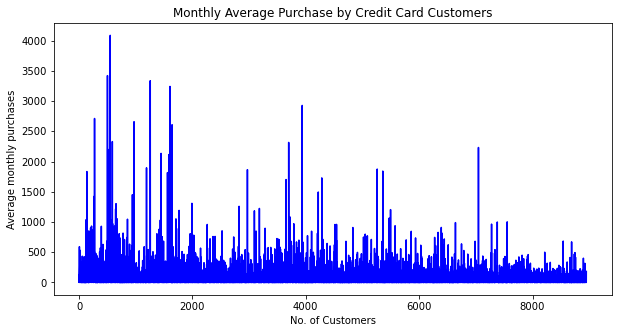

In [92]:
plt.figure(figsize=(10,5))
data['Monthly_avg_purchase'].plot(cmap="winter")
plt.title("Monthly Average Purchase by Credit Card Customers")
plt.xlabel("No. of Customers")
plt.ylabel("Average monthly purchases")
plt.show()

<hr>

- **Monthly_cash_advance**<br>
To find out the average monthly cash advance based on Tenure

In [93]:
data['Monthly_cash_advance'] = data['CASH_ADVANCE']/data['TENURE']
data['Monthly_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

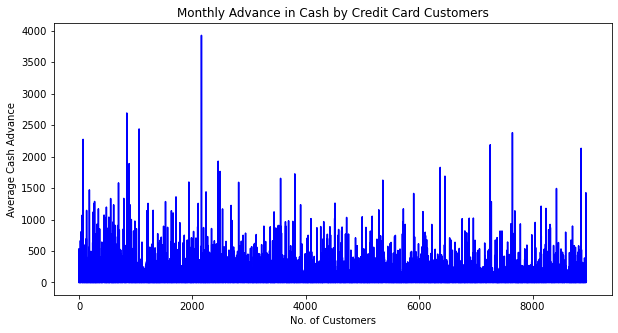

In [94]:
plt.figure(figsize=(10,5))
data['Monthly_cash_advance'].plot(cmap="winter")
plt.title("Monthly Advance in Cash by Credit Card Customers")
plt.xlabel("No. of Customers")
plt.ylabel("Average Cash Advance")
plt.show()

<hr>

- **Purchases by Type (one-off, Installments)**<br>
To check the mode of purchases customers are making using credit card

In [95]:
data.loc[:, ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']].head(15)

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,95.40,0.00,95.40
1,0.00,0.00,0.00
2,773.17,773.17,0.00
3,1499.00,1499.00,0.00
4,16.00,16.00,0.00
5,1333.28,0.00,1333.28
6,7091.01,6402.63,688.38
7,436.20,0.00,436.20
8,861.49,661.49,200.00
9,1281.60,1281.60,0.00


In [96]:
# Let's check the purchase behavior of customers w.r.t no. of customers
print("ONEOFF & INSTALLMENTS: \t",data[(data['ONEOFF_PURCHASES'] > 0) & (data['INSTALLMENTS_PURCHASES'] > 0)].shape[0])
print("ONEOFF: \t\t",data[(data['ONEOFF_PURCHASES'] > 0) & (data['INSTALLMENTS_PURCHASES'] == 0)].shape[0])
print("INSTALLMENTS: \t\t",data[(data['ONEOFF_PURCHASES'] == 0) & (data['INSTALLMENTS_PURCHASES'] > 0)].shape[0])
print("NO PURCHASE: \t\t",data[(data['ONEOFF_PURCHASES'] == 0) & (data['INSTALLMENTS_PURCHASES'] == 0)].shape[0])

ONEOFF & INSTALLMENTS: 	 2774
ONEOFF: 		 1874
INSTALLMENTS: 		 2260
NO PURCHASE: 		 2042


In [97]:
# Let's classify the data entries with the type of purchase
data['Purchase_Type'] = ""
for i, a, b in zip(data.index, data.ONEOFF_PURCHASES, data.INSTALLMENTS_PURCHASES):
    if((a > 0) and (b > 0)):
        data['Purchase_Type'][i] = 'both'
    elif((a > 0) and (b == 0)):
        data['Purchase_Type'][i] = 'oneoff'
    elif((a == 0) and (b > 0)):
        data['Purchase_Type'][i] = 'installments'
    elif((a == 0) and (b == 0)):
        data['Purchase_Type'][i] = 'none'

In [98]:
data['Purchase_Type'].value_counts()

both            2774
installments    2260
none            2042
oneoff          1874
Name: Purchase_Type, dtype: int64

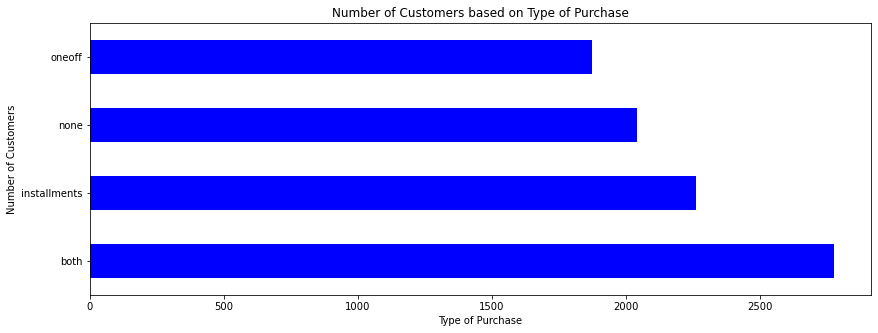

In [99]:
plt.figure(figsize=(14,5))
bplot = data['Purchase_Type'].value_counts().plot(kind='barh', cmap='winter')
plt.title("Number of Customers based on Type of Purchase")
plt.xlabel('Type of Purchase')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

<hr>

- **Limit Usage(balance to credit limit ratio)**<br>
This derives the credit utilization. Lower the ratio, Better is the credit score.

In [100]:
# Let's extract the limit usage ratio of Customers
data['limit_usage'] = data.apply(lambda x: round((x['BALANCE']/x['CREDIT_LIMIT'])*100, 2), axis=1)

In [101]:
data['limit_usage'].head(10)

0      4.09
1     45.75
2     33.27
3     22.22
4     68.14
5    100.55
6      4.65
7     79.29
8     14.50
9      1.38
Name: limit_usage, dtype: float64

<div style="color: #336699;">

<h4>As per the studies, a limit-ratio of 30% or less is considered acceptable by Lenders, while rising ratios prompts 'Concerns'</h4>(This can vary between Lenders)

Let's check for the distribution of the limit-ratio within the data and classify Customers based on limit-ratio in below 4 sections:
1. Good ------------ **Less than 30%**
2. Acceptable ---- **30% - 50%**
3. Risky ------------ **50% - 80%**
4. Bad -------------- **80% and above**
    
</div>

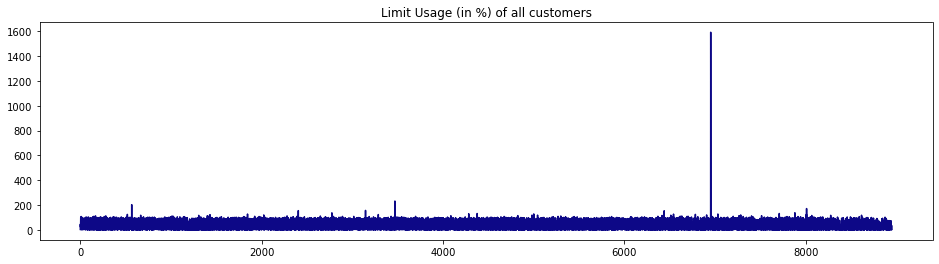

In [102]:
plt.figure(figsize=(16,4))
data['limit_usage'].plot(cmap='plasma')
plt.title("Limit Usage (in %) of all customers")
plt.show()

In [103]:
limit_ratio_class = []
for i in data['limit_usage']:
    if(i <= 30):
        limit_ratio_class.append('Good')
    elif(i > 30 and i <=50):
        limit_ratio_class.append('Acceptable')
    elif(i > 50 and i <=80):
        limit_ratio_class.append('Risky')
    elif(i > 80):
        limit_ratio_class.append('Bad')

data['limit_ratio_status'] = limit_ratio_class

In [104]:
data['limit_ratio_status'].value_counts(normalize=True)*100

Good          49.787709
Bad           20.245810
Risky         16.312849
Acceptable    13.653631
Name: limit_ratio_status, dtype: float64

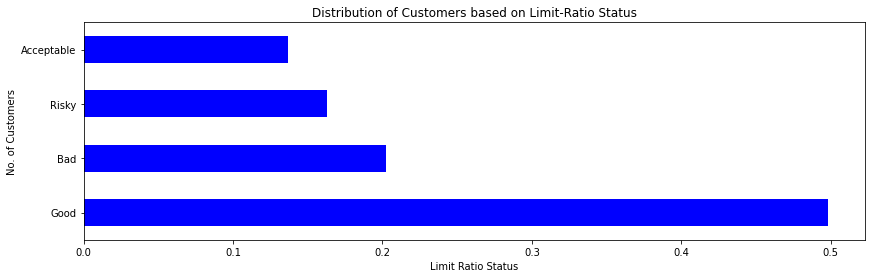

In [105]:
plt.figure(figsize=(14,4))
data['limit_ratio_status'].value_counts(normalize=True).plot(kind='barh', cmap='winter')
plt.title("Distribution of Customers based on Limit-Ratio Status")
plt.xticks(rotation=0)
plt.xlabel("Limit Ratio Status")
plt.ylabel("No. of Customers")
plt.show()

<hr>

- **Payment to minimum payments Ratio**<br>
Are the customers following minimum due method or not.

In [106]:
data['Payment_ratio']=data.apply(lambda x: round(x['PAYMENTS']/x['MINIMUM_PAYMENTS'], 3), axis=1)
data['Payment_ratio'].head(10)

0     1.447
1     3.826
2     0.992
3     0.000
4     2.771
5     0.582
6    32.082
7     1.276
8     2.206
9    11.613
Name: Payment_ratio, dtype: float64

count    8950.000000
mean        9.059164
std       118.180528
min         0.000000
25%         0.913250
50%         2.032500
75%         6.052750
max      6840.529000
Name: Payment_ratio, dtype: float64


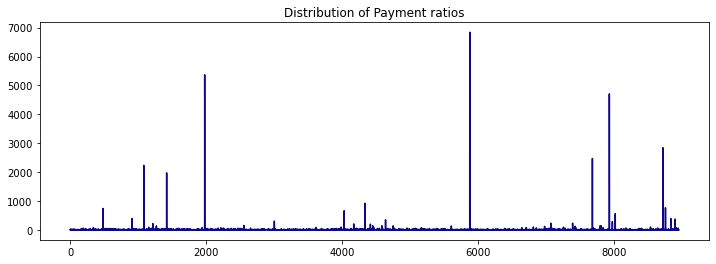

In [107]:
print(data['Payment_ratio'].describe())

data['Payment_ratio'].plot(cmap="plasma", figsize=(12,4))
plt.title("Distribution of Payment ratios")
plt.show()

<h1>________________________________________________________________</h1>

### 4. Outlier Treatment
Using Log-Transformation to treat the outliers

In [108]:
# Log Transformation
data_log = data.drop(['CUST_ID','Purchase_Type', 'limit_ratio_status'],axis=1).applymap(lambda x: np.log(x+1))

In [109]:
data_log.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,6.161637,2.013303,0.000000,4.861995,6.773521,7.628099,9.854515
BALANCE_FREQUENCY,8950.0,0.619940,0.148590,0.000000,0.635989,0.693147,0.693147,0.693147
PURCHASES,8950.0,4.899647,2.916872,0.000000,3.704627,5.892417,7.013133,10.800403
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.000000,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.000000,0.000000,4.499810,6.151961,10.021315
CASH_ADVANCE,8950.0,3.319086,3.566298,0.000000,0.000000,0.000000,7.016449,10.760839
PURCHASES_FREQUENCY,8950.0,0.361268,0.277317,0.000000,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158699,0.216672,0.000000,0.000000,0.080042,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270072,0.281852,0.000000,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113512,0.156716,0.000000,0.000000,0.000000,0.200671,0.916291


In [110]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
data_pre = data_log[[c for c in data_log.columns if c not in col ]]

In [111]:
data_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'Payment_ratio'],
      dtype='object')

<h1>________________________________________________________________</h1>

### 5. Insights from above obtained KPIs

In [112]:
# Average payment_minpayment ratio for each purchse type.
x = data.groupby('Purchase_Type').apply(lambda x: np.mean(x['Payment_ratio']))
print(x)

Purchase_Type
both             7.236989
installments    13.259003
none            10.087443
oneoff           5.571082
dtype: float64


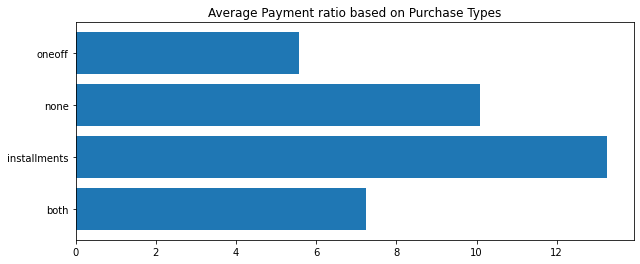

In [113]:
fig, ax = plt.subplots(figsize=(10,4))
ax.barh(y = range(len(x)), width = x.values, align = 'center')
ax.set(yticks = np.arange(len(x)), yticklabels = x.index);
plt.title('Average Payment ratio based on Purchase Types')
plt.show()

In [114]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,Payment_ratio
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,38.888313,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,38.972190,118.180528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,4.150000,0.913250
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,30.275000,2.032500
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,71.757500,6.052750
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,1591.000000,6840.529000


#### Insight 1: Customers with Installments purchase types are paying dues

In [115]:
data[data['Purchase_Type']=='n']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Purchase_Type,limit_usage,limit_ratio_status,Payment_ratio


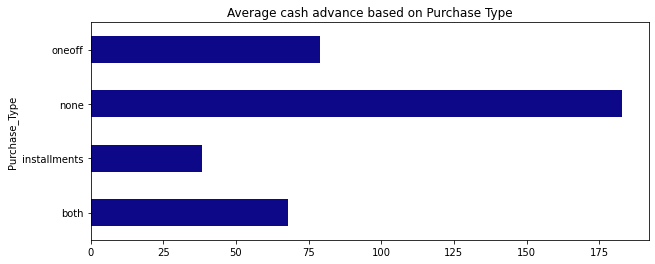

In [116]:
data.groupby('Purchase_Type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh(cmap = 'plasma', figsize=(10,4))
plt.title('Average cash advance based on Purchase Type')
plt.show()

#### Insight 2: Customers with 'none'  purchase types, often take more cash advance

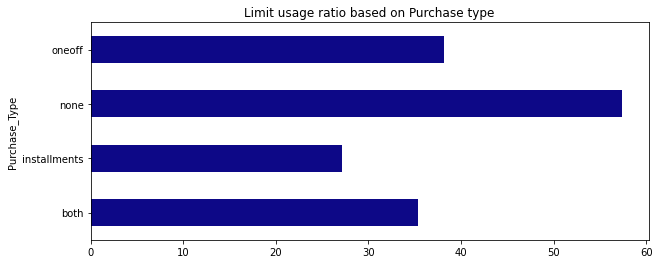

In [117]:
data.groupby('Purchase_Type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh(cmap = 'plasma', figsize=(10,4))
plt.title("Limit usage ratio based on Purchase type")
plt.show()

#### Insight 3: Customers with installment purchases have good credit score.

In [118]:
# Converting categorical variables in original dataset to numerical using get_dummies
data_original=pd.concat([data,pd.get_dummies(data['Purchase_Type'])],axis=1)
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Purchase_Type,limit_usage,limit_ratio_status,Payment_ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,installments,4.09,Good,1.447
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,45.75,Acceptable,3.826
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,oneoff,33.27,Acceptable,0.992
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,0.000000,312.343947,0.000000,12,124.916667,17.149001,oneoff,22.22,Good,0.000
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,oneoff,68.14,Risky,2.771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,325.594462,48.886365,0.500000,6,48.520000,0.000000,installments,2.85,Good,6.660
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,275.861322,312.343947,0.000000,6,50.000000,0.000000,installments,1.92,Good,0.883
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,81.270775,82.418369,0.250000,6,24.066667,0.000000,installments,2.34,Good,0.986
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,52.549959,55.755628,0.250000,6,0.000000,6.093130,none,2.69,Good,0.943


<h1>________________________________________________________________</h1>

## 6. Data Preparation for Modelling

In [119]:
# creating Dummies for categorical variable
data_pre['Purchase_Type']=data.loc[:,'Purchase_Type']
pd.get_dummies(data_pre['Purchase_Type']).head()

,both,installments,none,oneoff
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [120]:
data_dummy = pd.concat([data_pre,pd.get_dummies(data_pre['Purchase_Type'])],axis=1)

In [121]:
l = ['Purchase_Type']

In [122]:
data_dummy = data_dummy.drop(l,axis=1)
data_dummy.isnull().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
Monthly_avg_purchase                0
Monthly_cash_advance                0
limit_usage                         0
Payment_ratio                       0
both                                0
installments                        0
none                                0
oneoff                              0
dtype: int64

In [123]:
data_dummy.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,Payment_ratio,both,installments,none,oneoff
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,2.935293,1.357600,0.309944,0.252514,0.228156,0.209385
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,1.488966,0.940149,0.462496,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,1.638997,0.648803,0.000000,0.000000,0.000000,0.000000
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,3.442819,1.109387,0.000000,0.000000,0.000000,0.000000
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,4.287132,1.953418,1.000000,1.000000,0.000000,0.000000
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,7.372746,8.830767,1.000000,1.000000,1.000000,1.000000


In [124]:
corr_plot = data_dummy.corr().abs()
corr_plot

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,Payment_ratio,both,installments,none,oneoff
BALANCE_FREQUENCY,1.000000,0.140170,0.110565,0.211533,0.199116,0.162279,0.195083,0.191347,0.197594,0.136531,0.153342,0.572045,0.153432,0.191432,0.134614,0.011506,0.085719
ONEOFF_PURCHASES,0.140170,1.000000,0.161434,0.394093,0.813939,0.097157,0.128787,0.144803,0.574393,0.712306,0.182491,0.034376,0.236779,0.661126,0.573717,0.536671,0.414662
INSTALLMENTS_PURCHASES,0.110565,0.161434,1.000000,0.804211,0.191380,0.905443,0.310150,0.335621,0.782683,0.687568,0.377479,0.191301,0.185774,0.607277,0.448744,0.591238,0.559631
PURCHASES_FREQUENCY,0.211533,0.394093,0.804211,1.000000,0.503478,0.856976,0.345902,0.382579,0.921860,0.817176,0.433554,0.198148,0.196351,0.521602,0.309931,0.708043,0.193552
ONEOFF_PURCHASES_FREQUENCY,0.199116,0.813939,0.191380,0.503478,1.000000,0.143362,0.123254,0.145991,0.621698,0.624414,0.178300,0.006768,0.259542,0.556323,0.425733,0.398242,0.232995
PURCHASES_INSTALLMENTS_FREQUENCY,0.162279,0.097157,0.905443,0.856976,0.143362,1.000000,0.290847,0.315215,0.769837,0.613901,0.354226,0.173190,0.141582,0.486777,0.446637,0.520723,0.493143
CASH_ADVANCE_FREQUENCY,0.195083,0.128787,0.310150,0.345902,0.123254,0.290847,1.000000,0.936469,0.327403,0.341238,0.826931,0.460085,0.131030,0.104110,0.253079,0.403820,0.027924
CASH_ADVANCE_TRX,0.191347,0.144803,0.335621,0.382579,0.145991,0.315215,0.936469,1.000000,0.357895,0.378010,0.902805,0.498600,0.146745,0.109572,0.279532,0.448072,0.039111
PURCHASES_TRX,0.197594,0.574393,0.782683,0.921860,0.621698,0.769837,0.327403,0.357895,1.000000,0.899851,0.414205,0.140740,0.237106,0.620589,0.161920,0.749516,0.105244
Monthly_avg_purchase,0.136531,0.712306,0.687568,0.817176,0.624414,0.613901,0.341238,0.378010,0.899851,1.000000,0.426933,0.149987,0.290645,0.573881,0.089251,0.828244,0.106641


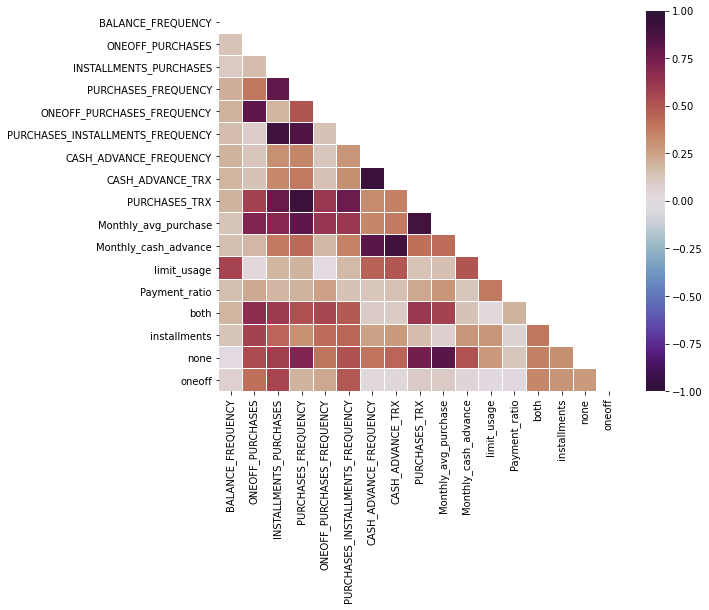

In [125]:
plt.figure(figsize=(9, 7))
mask = np.zeros_like(corr_plot, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_plot, vmin = -1, vmax = 1, cmap = 'twilight_shifted', mask = mask, linewidth=0.01)
plt.show()

#### Observation
**Heat map shows that many features are correlated to each-other, So, multi-collinearity should be removed by applying dimensionality reduction method***

Before applying PCA we will standardize data  to avoid effect of scale on our result.

<hr>

- **Scaling the Data using StandardScaler**

In [126]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
data_scaled = sc.fit_transform(data_dummy)

<h1>________________________________________________________________</h1>

### 7. Applying PCA 

In [127]:
var_ratio = {}
for n in range(3,14):
    pc = PCA(n_components=n)
    data_pca = pc.fit(data_scaled)
    var_ratio[n] = sum(data_pca.explained_variance_ratio_)

In [128]:
var_ratio

{3: 0.735444761131096,
 4: 0.8144395014608816,
 5: 0.8803152539784139,
 6: 0.9222252151800405,
 7: 0.9447418696251328,
 8: 0.9624525522859231,
 9: 0.9748162299613247,
 10: 0.9838817714729466,
 11: 0.9897210631812217,
 12: 0.9927700830366176,
 13: 0.9953947533805741}

#### Since 5 components are explaining about 88% variance, we are selecting 5 components

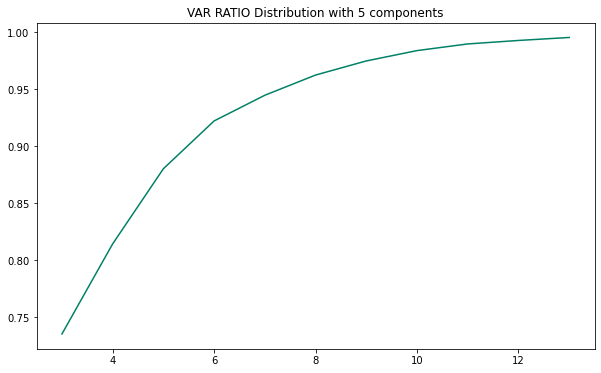

In [129]:
pc = PCA(n_components = 5)
p = pc.fit(data_scaled)

pd.Series(var_ratio).plot(cmap = 'summer', figsize=(10,6))
plt.title("VAR RATIO Distribution with 5 components")
plt.show()

In [130]:
pc_final = PCA(n_components = 5).fit(data_scaled)

data_reduced = pc_final.fit_transform(data_scaled)

In [131]:
dd = pd.DataFrame(data_reduced)

In [132]:
dd.shape

(8950, 5)

In [133]:
col_list = data_dummy.columns

In [134]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'Payment_ratio', 'both',
       'installments', 'none', 'oneoff'],
      dtype='object')

In [135]:
pd.DataFrame(pc_final.components_.T, columns=['PC' +str(i) for i in range(5)],index=col_list)

,PC0,PC1,PC2,PC3,PC4
BALANCE_FREQUENCY,0.028557,0.267359,-0.246411,-0.398825,-0.249776
ONEOFF_PURCHASES,0.212759,0.381103,0.276351,0.022826,-0.012148
INSTALLMENTS_PURCHASES,0.313451,-0.071831,-0.321544,0.091956,0.002384
PURCHASES_FREQUENCY,0.347035,0.028828,-0.157330,-0.073649,0.117684
ONEOFF_PURCHASES_FREQUENCY,0.213568,0.342889,0.196625,0.052755,-0.042710
PURCHASES_INSTALLMENTS_FREQUENCY,0.297007,-0.084035,-0.336753,0.022113,0.027923
CASH_ADVANCE_FREQUENCY,-0.215643,0.291988,-0.249763,0.100731,0.374139
CASH_ADVANCE_TRX,-0.230809,0.298501,-0.256336,0.107545,0.346410
PURCHASES_TRX,0.356344,0.113695,-0.089269,-0.046288,0.109622
Monthly_avg_purchase,0.346203,0.140651,0.038418,-0.075241,0.193760


### Factor Analysis
To explain the variance by each components

In [136]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC'+ str(i) for i in range(5)])

PC0    0.400239
PC1    0.187295
PC2    0.147912
PC3    0.078995
PC4    0.065876
dtype: float64

In [137]:
data_pca

PCA(n_components=13)

<h1>______________________________________________________________</h1>

### 8. KMeans Clustering 

Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the Purchase_Type

<hr>

<h3>With 4 clusters</h3>

In [138]:
k4 = KMeans(n_clusters = 4, random_state = 1234)
k4.fit(data_reduced)

k4.cluster_centers_

array([[ 2.46039286,  1.32399848, -0.40248025,  0.56170665, -0.53545129],
       [-0.55391606,  0.79913296,  2.39136629, -0.88091064,  0.76666426],
       [ 1.05069122, -2.32527704, -1.03279775, -0.48105018,  0.62773694],
       [-3.85952129,  0.01734737, -0.51056475,  0.56075627, -0.64918422]])

In [139]:
pd.Series(k4.labels_).value_counts()

0    2755
2    2228
3    2095
1    1872
dtype: int64

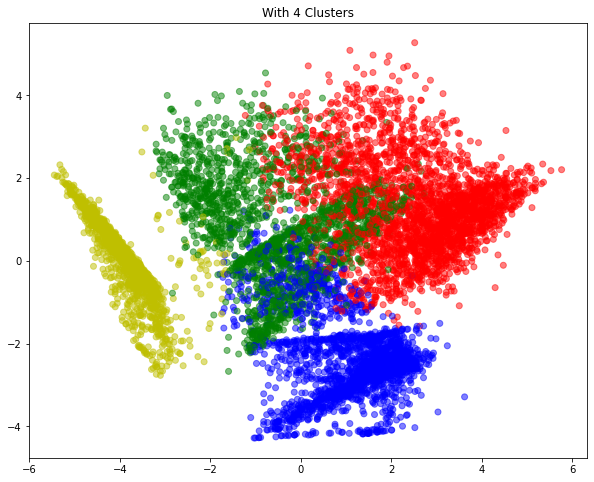

In [140]:
color_map = {0:'r',1:'g',2:'b',3:'y'}
label_color = [color_map[l] for l in k4.labels_]
plt.figure(figsize=(10,8))
plt.scatter(data_reduced[:,0], data_reduced[:,1], c = label_color, alpha=0.5)
plt.title("With 4 Clusters")
plt.show()

In [141]:
df_pair_plot = pd.DataFrame(data_reduced, columns = ['PC' + str(i) for i in range(5)])

In [142]:
# Adding the Cluster column in the data
df_pair_plot['Cluster'] = k4.labels_

In [143]:
df_pair_plot.head()

,PC0,PC1,PC2,PC3,PC4,Cluster
0,-0.268382,-2.742133,0.061779,-0.609493,-0.097673,2
1,-4.020418,0.263994,-0.631238,0.848581,-0.499524,3
2,1.228897,1.445245,2.751923,-2.014194,-0.083839,1
3,-1.124529,0.606259,2.449600,-1.462928,0.690202,1
4,-1.435795,-0.267045,2.254596,-1.622647,-0.637570,1


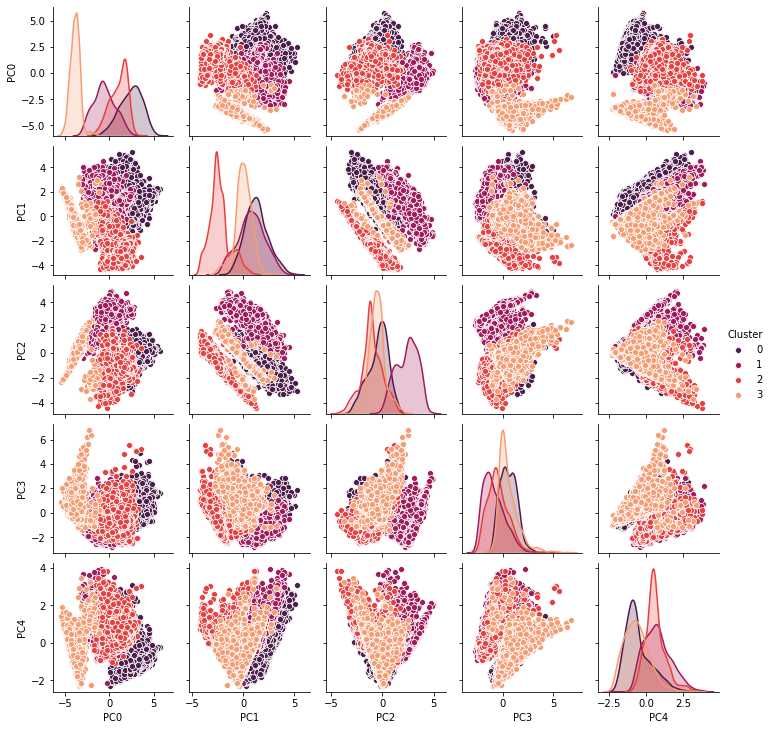

In [144]:
sns.pairplot(df_pair_plot, hue ='Cluster', palette = 'rocket', diag_kind = 'kde', size = 2)
plt.show()

**Only the first 2 components PC0, PC1 are able to match with the Cluster**

In [145]:
# Dropping the columns used in deriving new KPIs above and using rest other columns for Key performance
col_kpi = ['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage',
           'CASH_ADVANCE_TRX','Payment_ratio', 'both','installments','oneoff','none','CREDIT_LIMIT']

In [146]:
data_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,Payment_ratio
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,2.935293,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,1.488966,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,1.638997,0.648803
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,3.442819,1.109387
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,4.287132,1.953418
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,7.372746,8.830767


In [147]:
# Concatenating labels found through Kmeans with data 
cluster_df_4 = pd.concat([data_original[col_kpi], pd.Series(k4.labels_, name = 'Cluster4')], axis=1)


In [148]:
cluster_df_4.head()


,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,Payment_ratio,both,installments,oneoff,none,CREDIT_LIMIT,Cluster4
0,2,7.950000,0.000000,4.09,0,1.447,0,1,0,0,1000.0,2
1,0,0.000000,536.912124,45.75,4,3.826,0,0,0,1,7000.0,3
2,12,64.430833,0.000000,33.27,0,0.992,0,0,1,0,7500.0,1
3,1,124.916667,17.149001,22.22,1,0.000,0,0,1,0,7500.0,1
4,1,1.333333,0.000000,68.14,0,2.771,0,0,1,0,1200.0,1


In [149]:
# Mean value gives a good indication of the distribution of data.
# So we are finding mean value for each variable for each cluster.
cluster4 = cluster_df_4.groupby('Cluster4').apply(lambda x: x[col_kpi].mean()).T
cluster4


Cluster4,0,1,2,3
PURCHASES_TRX,33.155354,7.126603,12.056104,0.051551
Monthly_avg_purchase,193.879179,69.842115,47.585006,0.175096
Monthly_cash_advance,67.693639,77.926651,32.779633,186.608718
limit_usage,35.486203,37.912308,26.315521,57.605294
CASH_ADVANCE_TRX,2.810163,2.868056,1.005386,6.551790
Payment_ratio,7.269883,5.564807,13.398811,9.919391
both,1.000000,0.002671,0.004039,0.002387
installments,0.000000,0.000000,0.995961,0.019570
oneoff,0.000000,0.997329,0.000000,0.003341
none,0.000000,0.000000,0.000000,0.974702


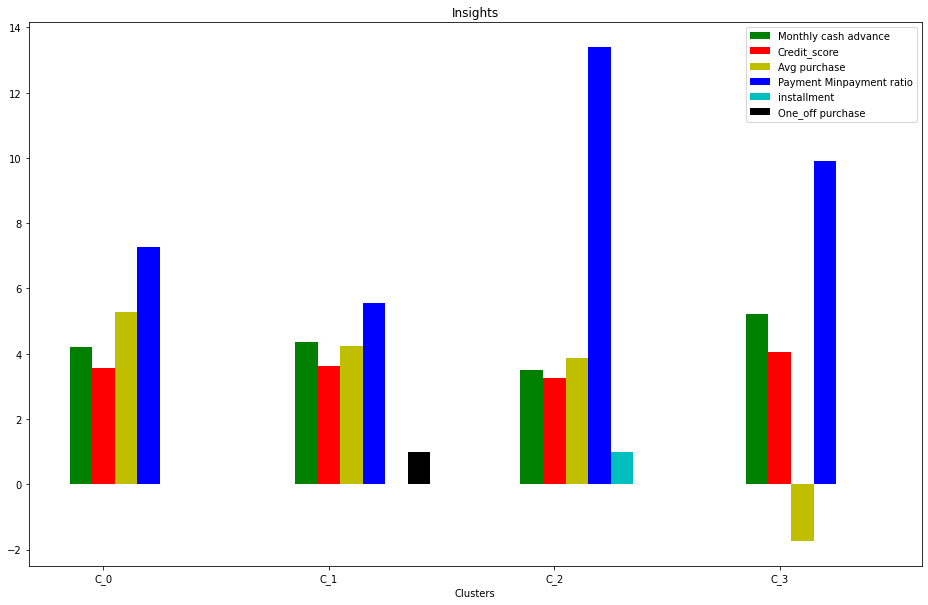

In [150]:
fig, ax = plt.subplots(figsize=(16,10))
index = np.arange(len(cluster4.columns))

cash_advance = np.log(cluster4.loc['Monthly_cash_advance',:].values)
credit_score = np.log(cluster4.loc['limit_usage',:].values)
purchase = np.log(cluster4.loc['Monthly_avg_purchase',:].values)
payment = cluster4.loc['Payment_ratio',:].values
installment = cluster4.loc['installments',:].values
oneoff = cluster4.loc['oneoff',:].values


bar_width = .10
                       
b1 = plt.bar(index, cash_advance, color = 'g', label = 'Monthly cash advance', width = bar_width)
b2 = plt.bar(index+bar_width, credit_score, color = 'r', label = 'Credit_score', width = bar_width)
b3 = plt.bar(index+2*bar_width, purchase, color = 'y', label = 'Avg purchase', width = bar_width)
b4 = plt.bar(index+3*bar_width, payment, color = 'b', label = 'Payment Minpayment ratio', width = bar_width)
b5 = plt.bar(index+4*bar_width, installment, color='c', label = 'installment', width = bar_width)
b6 = plt.bar(index+5*bar_width, oneoff, color='black', label = 'One_off purchase', width = bar_width)
                       
plt.title("Insights")
plt.xlabel("Clusters")
plt.xticks(index + bar_width, ('C_0', 'C_1', 'C_2', 'C_3'))
plt.legend()
plt.show()

##  Insights with 4 clusters

**Following behavior of Customers can be easily noticed with Clusters above**

---
- Cluster 0 customers have maximum Average Purchase and good Monthly cash advance but this cluster neither do installment nor one_off purchases.

- Cluster 1 customers are doing maximum One_Off transactions and has least payment ratio amongst all the cluster.

- cluster 2 is doing maximum installment, has maximum payment-minpayment ratio and does purchases only as intallments.

- Cluster 3 is the group of customers who have highest Monthly cash advance and have comparatively better credit score but have poor average purchase score.


#### Let's check the distribution of customers based on obtained 4 clusters above.

In [151]:
# Percentage of each cluster among the customers data
s = cluster_df_4.groupby('Cluster4').apply(lambda x: x['Cluster4'].value_counts())

per = pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print(pd.concat([pd.Series(s.values,name='No. of Customers'),round(per, 2)],axis=1))


   No. of Customers  Percentage
0              2755       30.78
1              1872       20.92
2              2228       24.89
3              2095       23.41


<hr>
<h3>With 5 Clusters</h3>

In [152]:
k5 = KMeans(n_clusters=5, random_state=123)
k5 = k5.fit(data_reduced)
k5.labels_

array([2, 1, 0, ..., 2, 1, 0])

In [153]:
pd.Series(k5.labels_).value_counts()

2    2118
1    2088
3    1973
0    1862
4     909
dtype: int64

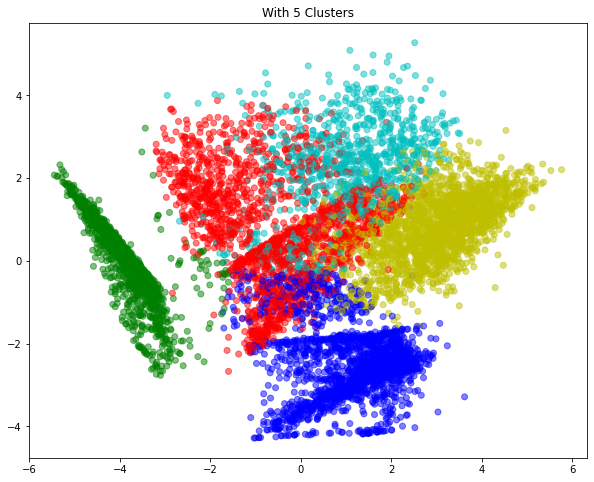

In [154]:
color_map = {0:'r',1:'g',2:'b',3:'y', 4:'c'}
label_color = [color_map[l] for l in k5.labels_]
plt.figure(figsize=(10,8))
plt.scatter(data_reduced[:,0], data_reduced[:,1], c = label_color, alpha=0.5)
plt.title("With 5 Clusters")
plt.show()

In [155]:
cluster_df_5 = pd.concat([data_original[col_kpi], pd.Series(k5.labels_, name='Cluster5')], axis=1)

In [156]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster5').apply(lambda x: x[col_kpi].mean()).T

Cluster5,0,1,2,3,4
PURCHASES_TRX,7.066058,0.039751,11.882436,34.615307,27.447745
Monthly_avg_purchase,68.696660,0.104768,47.197275,210.057887,141.614766
Monthly_cash_advance,74.903467,185.228217,16.433057,3.611118,251.040957
limit_usage,37.840644,57.626418,24.354778,26.577010,58.577888
CASH_ADVANCE_TRX,2.695489,6.451149,0.429178,0.144450,10.334433
Payment_ratio,5.535458,9.935615,13.904214,8.583165,4.007944
both,0.002685,0.000000,0.003305,1.000000,0.867987
installments,0.000000,0.018678,0.996695,0.000000,0.121012
oneoff,0.997315,0.003352,0.000000,0.000000,0.011001
none,0.000000,0.977969,0.000000,0.000000,0.000000


### Insights from 5 clusters

- We have a group of customers (cluster 2) having highest average purchases but there is Cluster 4 also having highest cash advance & second highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side

<big>***So we don't have quite distinguishable characteristics with 5 clusters***</big>

#### Let's check the distribution of customers based on obtained 5 clusters above.

In [157]:
s5 = cluster_df_5.groupby('Cluster5').apply(lambda x: x['Cluster5'].value_counts())

per5 = pd.Series((s5.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print(pd.concat([pd.Series(s5.values,name='No. of Customers'), per5], axis=1))

   No. of Customers  Percentage
0              1862   20.804469
1              2088   23.329609
2              2118   23.664804
3              1973   22.044693
4               909   10.156425


<hr>

### With 6 clusters

In [158]:
k6 = KMeans(n_clusters = 6).fit(data_reduced)
k6.labels_

array([2, 0, 3, ..., 2, 0, 4])

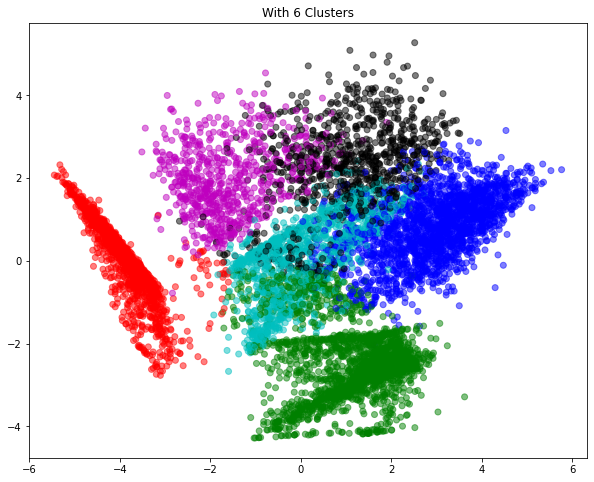

In [159]:
color_map = {0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color = [color_map[l] for l in k6.labels_]
plt.figure(figsize=(10,8))
plt.scatter(data_reduced[:,0], data_reduced[:,1], c = label_color, alpha=0.5)
plt.title("With 6 Clusters")
plt.show()

In [160]:
cluster_df_6 = pd.concat([data_original[col_kpi], pd.Series(k6.labels_, name='Cluster6')], axis=1)

In [161]:
six = cluster_df_6.groupby('Cluster6').apply(lambda x: x[col_kpi].mean()).T
six

Cluster6,0,1,2,3,4,5
PURCHASES_TRX,0.036521,34.702084,11.896975,7.675536,6.138504,27.552836
Monthly_avg_purchase,0.096702,210.612456,47.248137,76.847852,57.302121,140.061092
Monthly_cash_advance,184.778647,3.616065,16.681408,2.990759,200.313863,246.170285
limit_usage,57.583945,26.606187,24.460501,24.482129,59.487701,58.569099
CASH_ADVANCE_TRX,6.410860,0.144382,0.435728,0.089270,7.470914,10.046719
Payment_ratio,9.957586,8.605743,13.913616,6.863972,3.406212,3.930215
both,0.000000,1.000000,0.001418,0.011159,0.000000,0.879867
installments,0.018741,0.000000,0.998582,0.000000,0.000000,0.120133
oneoff,0.000000,0.000000,0.000000,0.988841,1.000000,0.000000
none,0.981259,0.000000,0.000000,0.000000,0.000000,0.000000


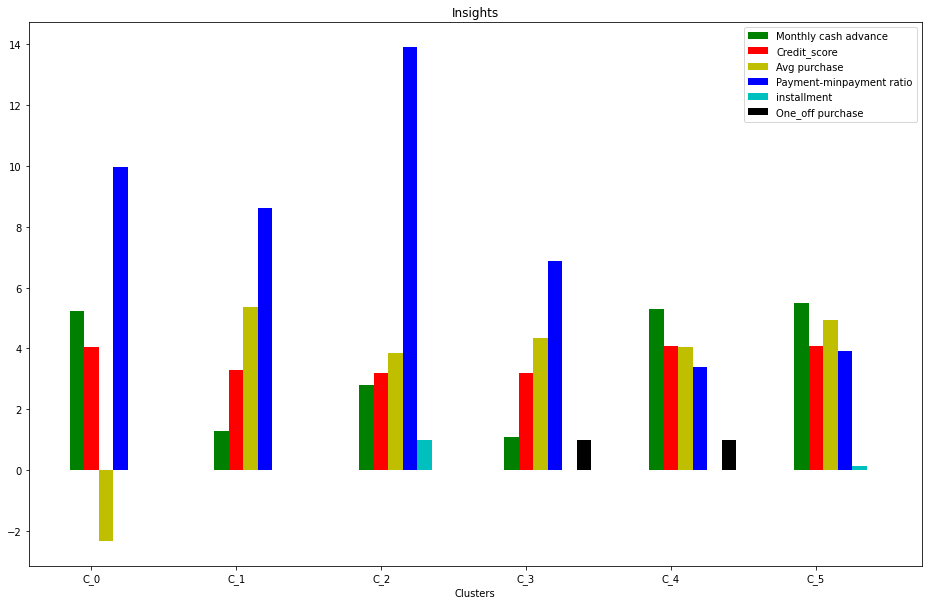

In [162]:
fig, ax = plt.subplots(figsize=(16,10))
index = np.arange(len(six.columns))

cash_advance = np.log(six.loc['Monthly_cash_advance',:].values)
credit_score = np.log(six.loc['limit_usage',:].values)
purchase = np.log(six.loc['Monthly_avg_purchase',:].values)
payment = six.loc['Payment_ratio',:].values
installment = six.loc['installments',:].values
one_off = six.loc['oneoff',:].values

bar_width=.10

b1 = plt.bar(index, cash_advance, color='g', label='Monthly cash advance', width = bar_width)
b2 = plt.bar(index+bar_width, credit_score, color='r', label='Credit_score', width = bar_width)
b3 = plt.bar(index+2*bar_width, purchase, color='y', label='Avg purchase', width = bar_width)
b4 = plt.bar(index+3*bar_width, payment, color='b', label='Payment-minpayment ratio', width = bar_width)
b5 = plt.bar(index+4*bar_width, installment, color='c', label='installment', width = bar_width)
b6 = plt.bar(index+5*bar_width, one_off, color='black', label='One_off purchase', width = bar_width)

plt.xlabel("Clusters")
plt.title("Insights")
plt.xticks(index + bar_width, ('C_0', 'C_1', 'C_2', 'C_3','C_4','C_5'))

plt.legend()
plt.show()

In [163]:
cash_advance = np.log(six.loc['Monthly_cash_advance',:].values)
credit_score = list(six.loc['limit_usage',:].values)
cash_advance

array([5.21915861, 1.28538649, 2.81429482, 1.09552706, 5.29988545,
       5.50602351])

### Insights with  6 clusters

- Here also groups are overlapping .
     - C_0 and C_2, both clusters are behaving very similar

<h1>_____________________________________________________________</h1>

## 9. Performance metrics for Kmeans
Using Silhouette score as metric for validating performance

In [164]:
score = {}
for n in range(3,10):
    kscore = KMeans(n_clusters = n)
    kscore.fit(data_reduced)
    score[n] = silhouette_score(data_reduced,kscore.labels_)

print(score)

{3: 0.374008460573359, 4: 0.4611019792630548, 5: 0.4552214976255, 6: 0.45110639255801865, 7: 0.42646886107577286, 8: 0.4398014105929916, 9: 0.4164248550895291}


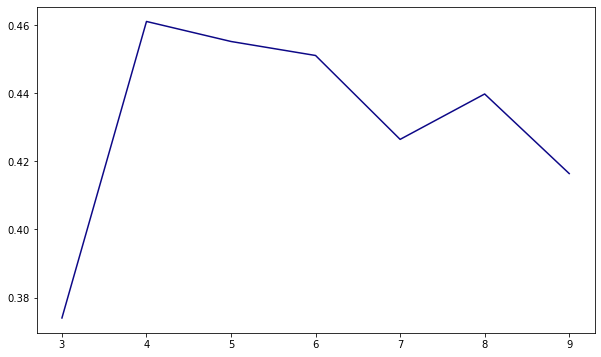

In [165]:
pd.Series(score).plot(cmap='plasma', figsize=(10,6))
plt.show()

<h1>___________________________________________________________</h1>

## 10. Summary

**It is clear with the Performance metric as well that, KMeans with 4 clusters is showing better distinguised characteristics among the group of Customers**

<big>
    <b>Let's check the Insights with 4 Clusters again</b>
</big>

---

- Cluster 0 customers have maximum Average Purchase and good Monthly cash advance but this cluster neither do installment nor one_off purchases.

- Cluster 1 customers are doing maximum One_Off transactions and has least payment ratio amongst all the cluster.

- Cluster 2 is doing maximum installment, has maximum payment-minpayment ratio and does purchases only as intallments.

- Cluster 3 is the group of customers who have highest Monthly cash advance and have comparatively better credit score but have poor average purchase score.

<h1>_________________________________________________________</h1>

## 11. Implementation of Strategies

### (c) Group 1
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score<br>
   **- Can increase credit limit or can lower down interest rate**<br>
   **- Can be given premium or loyalty memberships to increase transactions**


### (a) Group 2
   - This group has minimum paying ratio and using card for oneoff transactions (may be for utility bills only).<br>
   **This group seems to be risky group.**


### (b) Group 3
   - They have poor credit score and taking only cash on advance.<br>
   **We can target them by providing less interest rate on purchase transactions**


### (d) Group 4
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.<br>
  **Giving rewards point will make them perform more purchases.**
 